In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.gamma_ray_parameters import energy_res_comptel
from hazma.scalar_mediator import HiggsPortal, ScalarMediator
from hazma.vector_mediator import KineticMixing, VectorMediator
from utilities import colors, latex_text_width_1col

**Plots $e^+$ annihilation spectra for the scalar and vector models for annihilation into mediators.**

In [ ]:
# Dark matter masses
mxs = np.array([100.0, 250.0, 600.0])
# Mediator masses
mMs = np.array([10.0, 225.0, 300.0])
# List of models. The top row of the plot will contain the Higgs portal model
# spectra, the bottom the heavy quark model spectra.
models = [
    HiggsPortal(1.0, 1.0, gsxx=1.0, stheta=1e-1),
    KineticMixing(1.0, 1.0, gvxx=1.0, eps=0.1),
]

# Approximate Milky Way velocity dispersion, used to compute the DM
# center of mass energy
vx_mw = 1e-3

# Photon energies
e_p_min, e_p_max = 0.1, 1000.0
e_ps = np.geomspace(e_p_min, e_p_max, 250)

# Plot dimensions
n_subplot_rows, n_subplot_cols = len(models), len(mxs)

# Labels for mediator masses
mM_labels = np.array(
    [
        [{10: (1e0, 5e-2)}, {225: (2e0, 3e-4)}, {300: (5e0, 7e-4)}],
        [{10: (1e0, 5e-2)}, {225: (3e0, 1e-4)}, {300: (5e0, 3e-2)}],
    ]
)

# Color map for mediator masses
def cmap(mM):
    return colors[np.where(mMs == mM)[0][0]]

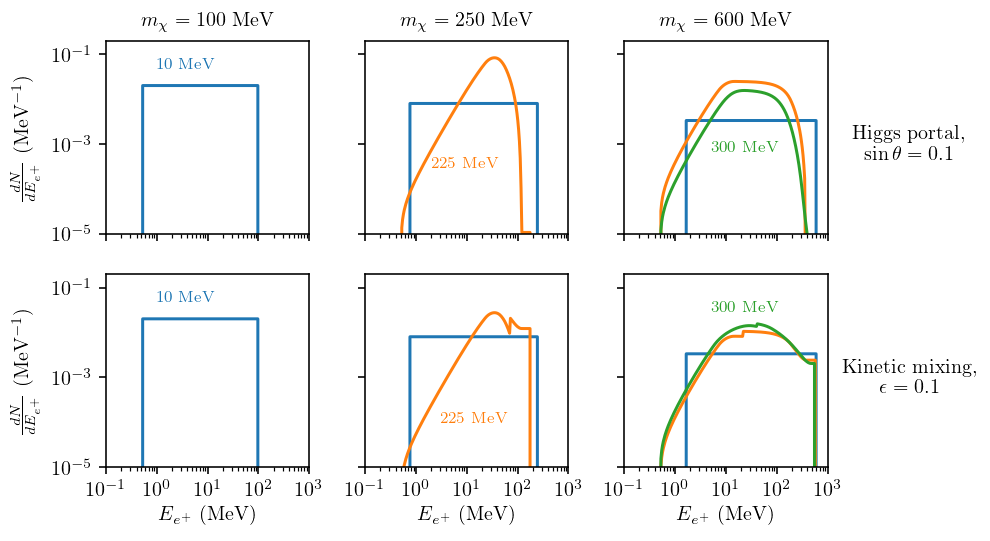

In [25]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col),
)

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]

        # Get the model and set DM mass to column's value
        model = models[row]
        model.mx = mxs[col]
        # DM center of mass energy
        e_cm = 2.0 * model.mx * (1.0 + 0.5 * vx_mw ** 2)

        # Loop over mediator masses
        for mM in mMs:
            if mM <= e_cm / 2:
                if isinstance(model, ScalarMediator):
                    model.ms = mM
                    fs = "s s"
                elif isinstance(model, VectorMediator):
                    model.mv = mM
                    fs = "v v"

                # Compute e+ spectrum for annihilation to mediators
                ax.loglog(e_ps, model.positron_spectra(e_ps, e_cm)[fs], color=cmap(mM))

        # Formatting: label mediator masses
        for mM, (x, y) in mM_labels[row, col].items():
            ax.text(x, y, r"%i MeV" % mM, fontsize=8, color=cmap(mM))

# Formatting
for row in range(n_subplot_rows):
    axes[row, 0].set_ylabel(r"$\frac{dN}{dE_{e^+}}$ (MeV$^{-1}$)")
    axes[row, 0].set_ylim(1e-5, 2e-1)

for col in range(n_subplot_cols):
    axes[0, col].set_title(r"$m_\chi = %i$ MeV" % mxs[col], fontsize=10)
    axes[-1, col].set_xlabel(r"$E_{e^+}$ (MeV)")
    axes[-1, col].set_xlim(e_p_min, e_p_max)

axes[0, -1].text(
    4e4,
    1e-3,
    "Higgs portal,\n" + r"$\sin\theta = 0.1$",
    ha="center",
    va="center",
    fontsize=10,
)
axes[1, -1].text(
    4e4,
    1e-3,
    "Kinetic mixing,\n" + r"$\epsilon = 0.1$",
    ha="center",
    va="center",
    fontsize=10,
)

fig.tight_layout()
fig.savefig("figures/positron_spectra_ann_to_med.pdf", bbox_inches="tight")
plt.show()